# Results Aggregation and Model Comparison

In this notebook, we collect and analyze the performance results of all trained models.  
Each pipeline has been saved as a `.joblib` file during the modeling phase, containing both the fitted model and a structured `results_summary` with detailed evaluation metrics.

The objectives of this notebook are:
- **Aggregate results** from all model families,  
  including both *basic* and *advanced* preprocessing pipelines as well as *TPE* and *GridSearch* optimization.
- **Provide a unified comparison table** across accuracy, precision, recall, F1, F2, and ROC-AUC scores on the final hold-out test set.
- **Visualize key results** with bar plots, confusion matrices, ROC and precision–recall curves, and threshold optimization plots.
- **Support the research questions** by identifying which combinations of preprocessing strategy, representation, and classifier deliver the best balance between performance and complexity.

By consolidating the evaluation in one place, this notebook enables a transparent and reproducible comparison of all tested pipelines. The resulting tables and figures will form the empirical foundation for the discussion and conclusion chapters of the thesis.


In [1]:
from pathlib import Path

root_path = Path.cwd().parents[0]   # supposed project root

print("root_path:", root_path)
print("Does src exist here? ", (root_path / "src").exists())
print("Contents of root_path:", [p.name for p in root_path.iterdir()])
print("Contents of src:", [p.name for p in (root_path / "src").iterdir()] if (root_path / "src").exists() else "no src folder")



root_path: c:\Users\tdoro\Documents\GitHub\clean-repo
Does src exist here?  True
Contents of root_path: ['.git', '.gitattributes', '.gitignore', '.vscode', '01data_collection', '02exploratory_analysis.ipynb', '03prep_for_labeling', '04doccano_labeling', '05modeling_pipelines', '06further_experimentation', '07results', 'base_env_log.yml', 'README.md', 'src', '__init__.py']
Contents of src: ['bilstm_skorch.py', 'cleaning.py', 'eurobert_skorch.py', 'evaluation_visualization.py', 'fasttext_embeddings', 'fasttext_sklearn.py', 'fasttext_vectorizer.py', 'optimize_threshold.py', 'optuna_optimizer.py', 'optuna_visualizations.py', 'phrase_trainer.py', 'phrase_transformer.py', 'preprocessing.py', 'widemlp_skorch.py', '__init__.py', '__pycache__']


In [2]:
from pathlib import Path
import sys
import os
import glob
import joblib
import pandas as pd
import pickle

root_path = Path.cwd().parents[0]  
if str(root_path) not in sys.path:
    sys.path.append(str(root_path))

print("Root path added:", root_path)

import src.optimize_threshold
print("Import works now")

# HuggingFace "transformers_modules" fix
hf_modules_root = Path(r"C:\Users\tdoro\.cache\huggingface\modules")
if str(hf_modules_root) not in sys.path:
    sys.path.append(str(hf_modules_root))
    print("Added HF modules path:", hf_modules_root)

Root path added: c:\Users\tdoro\Documents\GitHub\clean-repo
Import works now
Added HF modules path: C:\Users\tdoro\.cache\huggingface\modules


In [3]:
# path to all model joblibs
models_root = root_path / "05modeling_pipelines"

# search all stored joblib files recursvely
joblib_files = glob.glob(os.path.join(models_root, "**", "*.joblib"), recursive=True)

print(f"Found {len(joblib_files)} joblib files.")
for f in joblib_files:
    print(f)

Found 40 joblib files.
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\eurobert\model_eurobert_advanced_gridsearch.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\eurobert\model_eurobert_advanced_tpe.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\eurobert\model_eurobert_basic_gridsearch.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\eurobert\model_eurobert_basic_tpe.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\fasttext\model_fasttext_advanced_gridsearch.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\fasttext\model_fasttext_advanced_tpe.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\fasttext\model_fasttext_basic_gridsearch.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\fasttext\model_fasttext_basic_tpe.joblib
c:\Users\tdoro\Documents\GitHub\clean-repo\05modeling_pipelines\fasttext_bilstm\model_fasttext_bi

In [4]:
data = joblib.load(f"{models_root}/eurobert/model_eurobert_advanced_tpe.joblib")
print(data.keys())

results_summary = data["results_summary"]

print("Keys in results_summary:", results_summary.keys())
print("Test metrics:", results_summary["test_results"]["test_performance_metrics"])


c:\Users\tdoro\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dict_keys(['model', 'base_model', 'threshold', 'cv_score', 'best_params', 'search_type', 'results_summary'])
Keys in results_summary: dict_keys(['model_name', 'preprocessing_type', 'optimization_method', 'best_params', 'cv_results', 'test_results', 'dataset_info'])
Test metrics: {'classification_report': {'0': {'precision': 0.9310344827586207, 'recall': 0.9246575342465754, 'f1-score': 0.9278350515463918, 'support': 146.0}, '1': {'precision': 0.8, 'recall': 0.8148148148148148, 'f1-score': 0.8073394495412844, 'support': 54.0}, 'accuracy': 0.895, 'macro avg': {'precision': 0.8655172413793104, 'recall': 0.8697361745306951, 'f1-score': 0.8675872505438381, 'support': 200.0}, 'weighted avg': {'precision': 0.895655172413793, 'recall': 0.895, 'f1-score': 0.8953012390050128, 'support': 200.0}}, 'additional_metrics': {'accuracy': 0.895, 'f2_score': 0.8118081180811808, 'roc_auc': 0.9339167935058346, 'auc_pr': 0.8491080381305212}, 'class_1_metrics': {'precision': 0.8, 'recall': 0.8148148148148148, 

In [5]:
results_summary = data["results_summary"]

print("Keys in results_summary:", results_summary.keys())
print("Test metrics:", results_summary["test_results"]["test_performance_metrics"])

Keys in results_summary: dict_keys(['model_name', 'preprocessing_type', 'optimization_method', 'best_params', 'cv_results', 'test_results', 'dataset_info'])
Test metrics: {'classification_report': {'0': {'precision': 0.9310344827586207, 'recall': 0.9246575342465754, 'f1-score': 0.9278350515463918, 'support': 146.0}, '1': {'precision': 0.8, 'recall': 0.8148148148148148, 'f1-score': 0.8073394495412844, 'support': 54.0}, 'accuracy': 0.895, 'macro avg': {'precision': 0.8655172413793104, 'recall': 0.8697361745306951, 'f1-score': 0.8675872505438381, 'support': 200.0}, 'weighted avg': {'precision': 0.895655172413793, 'recall': 0.895, 'f1-score': 0.8953012390050128, 'support': 200.0}}, 'additional_metrics': {'accuracy': 0.895, 'f2_score': 0.8118081180811808, 'roc_auc': 0.9339167935058346, 'auc_pr': 0.8491080381305212}, 'class_1_metrics': {'precision': 0.8, 'recall': 0.8148148148148148, 'f1_score': 0.8073394495412844}}


In [6]:
import joblib
import pandas as pd
import os, glob, gc, torch

models_root = root_path / "05modeling_pipelines"
joblib_files = glob.glob(os.path.join(models_root, "**", "*.joblib"), recursive=True)

records = []
errors = []

for f in joblib_files:
    try:
        # Laden
        data = joblib.load(f)
        
        # Nur results_summary extrahieren
        summary = data.get("results_summary", {})
        records.append({
            "file": f,
            "model_name": summary.get("model_name"),
            "preprocessing": summary.get("preprocessing_type"),
            "optimization": summary.get("optimization_method"),
            "best_params": summary.get("best_params"),
            "cv_best_f2": summary.get("cv_results", {}).get("best_f2_score"),
            "cv_f2_with_threshold": summary.get("cv_results", {}).get("cv_f2_with_threshold"),
            "test_metrics": summary.get("test_results", {}).get("test_performance_metrics"),
            "threshold": summary.get("test_results", {}).get("threshold_used"),
            "train_size": summary.get("dataset_info", {}).get("train_size"),
            "test_size": summary.get("dataset_info", {}).get("test_size"),
            "train_pos_ratio": summary.get("dataset_info", {}).get("train_positive_ratio"),
            "test_pos_ratio": summary.get("dataset_info", {}).get("test_positive_ratio")
        })
        
        # sofort wieder freigeben
        del data, summary
        gc.collect()
        try:
            torch.cuda.empty_cache()
        except Exception:
            pass
        
    except Exception as e:
        errors.append((f, str(e)))

df_results = pd.DataFrame(records)
print("Loaded summaries from", len(df_results), "joblibs.")
print("Errors:", errors[:3])


Loaded summaries from 40 joblibs.
Errors: []


In [55]:
df_results[["model_name", "test_metrics"]].head()


,model_name,test_metrics
0,eurobert_advanced_gridsearch,{'classification_report': {'0': {'precision': ...
1,eurobert_advanced_tpe,{'classification_report': {'0': {'precision': ...
2,eurobert_basic_gridsearch,{'classification_report': {'0': {'precision': ...
3,eurobert_basic_tpe,{'classification_report': {'0': {'precision': ...
4,fasttext_advanced_gridsearch,{'classification_report': {'0': {'precision': ...


In [56]:
import pandas as pd
from pandas import json_normalize

expanded_rows = []

for _, row in df_results.iterrows():
    metrics = row["test_metrics"] or {}
    
    # 1) Extract classification_report
    cls_report = metrics.get("classification_report", {})
    flat_cls = pd.json_normalize(cls_report, sep="_")
    flat_cls = flat_cls.rename(columns=lambda c: c.replace(" ", "_").replace("-", ""))
    flat_cls = flat_cls.to_dict(orient="records")[0]
    
    # 2) Extract other top-level metrics
    other_metrics = {k: v for k, v in metrics.items() if k not in ["classification_report", "additional_metrics", "class_1_metrics"]}
    
    # 3) Flatten additional_metrics if present
    additional = metrics.get("additional_metrics", {})
    flat_add = pd.json_normalize(additional, sep="_").to_dict(orient="records")[0] if isinstance(additional, dict) else {}
    
    # 4) Flatten class_1_metrics if present
    class1 = metrics.get("class_1_metrics", {})
    flat_class1 = pd.json_normalize(class1, sep="_").to_dict(orient="records")[0] if isinstance(class1, dict) else {}
    
    # 5) Combine everything
    combined = {
        **row.drop("test_metrics").to_dict(),
        **other_metrics,
        **flat_cls,
        **flat_add,
        **flat_class1
    }
    
    expanded_rows.append(combined)

df_expanded = pd.DataFrame(expanded_rows)

print("Available columns:", df_expanded.columns.tolist())
df_expanded.head(3)


Available columns: ['file', 'model_name', 'preprocessing', 'optimization', 'best_params', 'cv_best_f2', 'cv_f2_with_threshold', 'threshold', 'train_size', 'test_size', 'train_pos_ratio', 'test_pos_ratio', 'accuracy', '0_precision', '0_recall', '0_f1score', '0_support', '1_precision', '1_recall', '1_f1score', '1_support', 'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1score', 'macro_avg_support', 'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1score', 'weighted_avg_support', 'f2_score', 'roc_auc', 'auc_pr', 'precision', 'recall', 'f1_score']


,file,model_name,preprocessing,optimization,best_params,cv_best_f2,cv_f2_with_threshold,threshold,train_size,test_size,...,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1score,weighted_avg_support,f2_score,roc_auc,auc_pr,precision,recall,f1_score
0,c:\Users\tdoro\Documents\GitHub\clean-repo\05m...,eurobert_advanced_gridsearch,advanced,Optuna TPE/GS + TunedThresholdClassifierCV,"{'clf__lr': 1e-05, 'clf__optimizer__weight_dec...",0.868071,0.895455,0.010714,800,200,...,0.884370,0.885,0.884659,200.0,0.780669,0.933029,0.822920,0.792453,0.777778,0.785047
1,c:\Users\tdoro\Documents\GitHub\clean-repo\05m...,eurobert_advanced_tpe,advanced,Optuna TPE/GS + TunedThresholdClassifierCV,"{'clf__lr': 2.368863950364079e-05, 'clf__batch...",0.840113,0.929809,0.020918,800,200,...,0.895655,0.895,0.895301,200.0,0.811808,0.933917,0.849108,0.800000,0.814815,0.807339
2,c:\Users\tdoro\Documents\GitHub\clean-repo\05m...,eurobert_basic_gridsearch,basic,Optuna TPE/GS + TunedThresholdClassifierCV,"{'clf__lr': 1e-05, 'clf__optimizer__weight_dec...",0.775976,0.883165,0.010459,800,200,...,0.868714,0.860,0.862856,200.0,0.791367,0.903983,0.788090,0.709677,0.814815,0.758621


In [57]:
# relevant columns
cols_keep = [
    "model_name",
    "preprocessing",
    "cv_best_f2",
    "cv_f2_with_threshold",
    "accuracy",
    "f2_score",
    "roc_auc",
    "auc_pr",
    "precision",
    "recall",
    "f1_score"
]

# 
cols_keep = [c for c in cols_keep if c in df_expanded.columns]

df_final_results = df_expanded[cols_keep].copy()

df_final_results

,model_name,preprocessing,cv_best_f2,cv_f2_with_threshold,accuracy,f2_score,roc_auc,auc_pr,precision,recall,f1_score
0,eurobert_advanced_gridsearch,advanced,0.868071,0.895455,0.885,0.780669,0.933029,0.822920,0.792453,0.777778,0.785047
1,eurobert_advanced_tpe,advanced,0.840113,0.929809,0.895,0.811808,0.933917,0.849108,0.800000,0.814815,0.807339
2,eurobert_basic_gridsearch,basic,0.775976,0.883165,0.860,0.791367,0.903983,0.788090,0.709677,0.814815,0.758621
3,eurobert_basic_tpe,basic,0.797552,0.932595,0.830,0.737410,0.903475,0.822520,0.661290,0.759259,0.706897
4,fasttext_advanced_gridsearch,advanced,0.799836,0.737342,0.585,0.754986,0.882927,0.750726,0.392593,0.981481,0.560847
5,fasttext_advanced_tpe,advanced,0.808999,0.646121,0.270,0.649038,0.853501,0.723172,0.270000,1.000000,0.425197
6,fasttext_basic_gridsearch,basic,0.750476,0.750654,0.715,0.772871,0.868087,0.742688,0.485149,0.907407,0.632258
7,fasttext_basic_tpe,basic,0.646121,0.646121,0.270,0.649038,0.512430,0.275041,0.270000,1.000000,0.425197
8,fasttext_bilstm_advanced_tpe,advanced,0.803914,0.766871,0.795,0.731707,0.846651,0.735504,0.591549,0.777778,0.672000
9,fasttext_bilstm_basic_tpe,basic,0.726044,0.738681,0.720,0.730519,0.836124,0.698339,0.489130,0.833333,0.616438


In [58]:

df_final_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_name            40 non-null     object 
 1   preprocessing         40 non-null     object 
 2   cv_best_f2            39 non-null     float64
 3   cv_f2_with_threshold  38 non-null     float64
 4   accuracy              40 non-null     float64
 5   f2_score              40 non-null     float64
 6   roc_auc               40 non-null     float64
 7   auc_pr                40 non-null     float64
 8   precision             40 non-null     float64
 9   recall                40 non-null     float64
 10  f1_score              40 non-null     float64
dtypes: float64(9), object(2)
memory usage: 3.6+ KB


In [59]:
# Ensure all model_name values are strings
df_final_results["model_name"] = df_final_results["model_name"].astype(str)
# Clean model_name: ensure string and remove { }, ' and extra spaces
df_final_results["model_name"] = (
    df_final_results["model_name"]
    .astype(str)
    .str.replace(r"[{}']", "", regex=True)  # remove {, }, and '
    .str.strip()
)

# sanity check: no braces or quotes left
assert not df_final_results["model_name"].str.contains(r"[{}']").any(), "Braces or quotes still present!"

# Extract suffix after last "_"
df_final_results["hp_search"] = df_final_results["model_name"].str.split("_").str[-1]

# Map suffix to normalized values
df_final_results["hp_search"] = df_final_results["hp_search"].map({
    "gridsearch": "gridsearch",
    "tpe": "optuna_tpe"
})

df_final_results

,model_name,preprocessing,cv_best_f2,cv_f2_with_threshold,accuracy,f2_score,roc_auc,auc_pr,precision,recall,f1_score,hp_search
0,eurobert_advanced_gridsearch,advanced,0.868071,0.895455,0.885,0.780669,0.933029,0.822920,0.792453,0.777778,0.785047,gridsearch
1,eurobert_advanced_tpe,advanced,0.840113,0.929809,0.895,0.811808,0.933917,0.849108,0.800000,0.814815,0.807339,optuna_tpe
2,eurobert_basic_gridsearch,basic,0.775976,0.883165,0.860,0.791367,0.903983,0.788090,0.709677,0.814815,0.758621,gridsearch
3,eurobert_basic_tpe,basic,0.797552,0.932595,0.830,0.737410,0.903475,0.822520,0.661290,0.759259,0.706897,optuna_tpe
4,fasttext_advanced_gridsearch,advanced,0.799836,0.737342,0.585,0.754986,0.882927,0.750726,0.392593,0.981481,0.560847,gridsearch
5,fasttext_advanced_tpe,advanced,0.808999,0.646121,0.270,0.649038,0.853501,0.723172,0.270000,1.000000,0.425197,optuna_tpe
6,fasttext_basic_gridsearch,basic,0.750476,0.750654,0.715,0.772871,0.868087,0.742688,0.485149,0.907407,0.632258,gridsearch
7,fasttext_basic_tpe,basic,0.646121,0.646121,0.270,0.649038,0.512430,0.275041,0.270000,1.000000,0.425197,optuna_tpe
8,fasttext_bilstm_advanced_tpe,advanced,0.803914,0.766871,0.795,0.731707,0.846651,0.735504,0.591549,0.777778,0.672000,optuna_tpe
9,fasttext_bilstm_basic_tpe,basic,0.726044,0.738681,0.720,0.730519,0.836124,0.698339,0.489130,0.833333,0.616438,optuna_tpe


In [60]:
import pandas as pd

# numeric columns we want to compare column-wise
numeric_cols = [
    "cv_best_f2","cv_f2_with_threshold","accuracy","f2_score",
    "roc_auc","auc_pr","precision","recall","f1_score"
]

# ensure numeric dtypes
df_final_results[numeric_cols] = df_final_results[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)

# 1) Show in notebook with bold column-wise maxima
styled = (
    df_final_results
    .style
    # highlight column-wise maxima with bold font
    .highlight_max(subset=numeric_cols, axis=0, props="font-weight: bold;")
    # optional: consistent number formatting
    .format({c: "{:.3f}" for c in numeric_cols})
)
styled  # renders in Jupyter


,model_name,preprocessing,cv_best_f2,cv_f2_with_threshold,accuracy,f2_score,roc_auc,auc_pr,precision,recall,f1_score,hp_search
0,eurobert_advanced_gridsearch,advanced,0.868,0.895,0.885,0.781,0.933,0.823,0.792,0.778,0.785,gridsearch
1,eurobert_advanced_tpe,advanced,0.840,0.930,0.895,0.812,0.934,0.849,0.800,0.815,0.807,optuna_tpe
2,eurobert_basic_gridsearch,basic,0.776,0.883,0.860,0.791,0.904,0.788,0.710,0.815,0.759,gridsearch
3,eurobert_basic_tpe,basic,0.798,0.933,0.830,0.737,0.903,0.823,0.661,0.759,0.707,optuna_tpe
4,fasttext_advanced_gridsearch,advanced,0.800,0.737,0.585,0.755,0.883,0.751,0.393,0.981,0.561,gridsearch
5,fasttext_advanced_tpe,advanced,0.809,0.646,0.270,0.649,0.854,0.723,0.270,1.000,0.425,optuna_tpe
6,fasttext_basic_gridsearch,basic,0.750,0.751,0.715,0.773,0.868,0.743,0.485,0.907,0.632,gridsearch
7,fasttext_basic_tpe,basic,0.646,0.646,0.270,0.649,0.512,0.275,0.270,1.000,0.425,optuna_tpe
8,fasttext_bilstm_advanced_tpe,advanced,0.804,0.767,0.795,0.732,0.847,0.736,0.592,0.778,0.672,optuna_tpe
9,fasttext_bilstm_basic_tpe,basic,0.726,0.739,0.720,0.731,0.836,0.698,0.489,0.833,0.616,optuna_tpe


In [65]:


# Adjust model_name directly
df_final_results.loc[10, "model_name"] = df_final_results.loc[10, "model_name"].replace("tfidf_bilstm", "fasttext_bilstm")
df_final_results.loc[11, "model_name"] = df_final_results.loc[11, "model_name"].replace("tfidf_bilstm", "fasttext_bilstm")
df_final_results.loc[18, "model_name"] = df_final_results.loc[18, "model_name"].replace("tfidf_xgb", "fasttext_xgb")

# Check results
df_final_results.loc[[10, 11, 18], "model_name"]


10    fasttext_bilstm_advanced_gridsearch
11       fasttext_bilstm_basic_gridsearch
18              fasttext_xgb_advanced_tpe
Name: model_name, dtype: object

In [68]:
import re
#map base model
def extract_model_base(name: str) -> str:
    # End-to-End models
    if name.startswith("eurobert"):
        return "eurobert"
    if name.startswith("fasttext_basic") or name.startswith("fasttext_advanced"):
        return "fasttext"
    if name.startswith("baseline"):
        return "baseline"
    if name.startswith("fasttext_centroid_basic"):
        return "fasttext_centroid"
    
    # All other pipelines → keep embedding+classifier (remove basic/advanced/tpe/gridsearch)
    return re.sub(r"_(basic|advanced)_(tpe|gridsearch)$", "", name)




df_final_results["model_base"] = df_final_results["model_name"].apply(extract_model_base)
df_final_results


,model_name,preprocessing,cv_best_f2,cv_f2_with_threshold,accuracy,f2_score,roc_auc,auc_pr,precision,recall,f1_score,hp_search,model_base
0,eurobert_advanced_gridsearch,advanced,0.868,0.895,0.885,0.781,0.933,0.823,0.792,0.778,0.785,gridsearch,eurobert
1,eurobert_advanced_tpe,advanced,0.840,0.930,0.895,0.812,0.934,0.849,0.800,0.815,0.807,optuna_tpe,eurobert
2,eurobert_basic_gridsearch,basic,0.776,0.883,0.860,0.791,0.904,0.788,0.710,0.815,0.759,gridsearch,eurobert
3,eurobert_basic_tpe,basic,0.798,0.933,0.830,0.737,0.903,0.823,0.661,0.759,0.707,optuna_tpe,eurobert
4,fasttext_advanced_gridsearch,advanced,0.800,0.737,0.585,0.755,0.883,0.751,0.393,0.981,0.561,gridsearch,fasttext
5,fasttext_advanced_tpe,advanced,0.809,0.646,0.270,0.649,0.854,0.723,0.270,1.000,0.425,optuna_tpe,fasttext
6,fasttext_basic_gridsearch,basic,0.750,0.751,0.715,0.773,0.868,0.743,0.485,0.907,0.632,gridsearch,fasttext
7,fasttext_basic_tpe,basic,0.646,0.646,0.270,0.649,0.512,0.275,0.270,1.000,0.425,optuna_tpe,fasttext
8,fasttext_bilstm_advanced_tpe,advanced,0.804,0.767,0.795,0.732,0.847,0.736,0.592,0.778,0.672,optuna_tpe,fasttext_bilstm
9,fasttext_bilstm_basic_tpe,basic,0.726,0.739,0.720,0.731,0.836,0.698,0.489,0.833,0.616,optuna_tpe,fasttext_bilstm


In [69]:
import pandas as pd
from datetime import datetime
#export into excel
numeric_cols = [
    "cv_best_f2","cv_f2_with_threshold","accuracy","f2_score",
    "roc_auc","auc_pr","precision","recall","f1_score"
]
df_final_results[numeric_cols] = df_final_results[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)
# Round all float columns to 3 decimals
df_final_results = df_final_results.round(3)


styled = (
    df_final_results
    .style
    .highlight_max(subset=numeric_cols, axis=0, props="font-weight: bold;")
    .format({c: "{:.3f}" for c in numeric_cols})
)

out_path = f"model_results_{datetime.now():%Y%m%d_%H%M}.xlsx"
with pd.ExcelWriter(out_path, engine="openpyxl") as writer:
    styled.to_excel(writer, sheet_name="Results", index=False)

print("Exported:", out_path)

Exported: model_results_20250917_1950.xlsx


In [ ]:
#define ranking for models
complexity_order = {
    "baseline": 0,
    # TF-IDF family
    "tfidf_mnb": 1,
    "tfidf_logreg": 2,
    "tfidf_linearsvc": 3,
    "tfidf_xgb": 4,
    "tfidf_mlp": 5,
    # FastText family
    "fasttext_centroid": 6,
    "fasttext_xgb": 7,
    "fasttext": 8,
    "fasttext_bilstm": 9,
    # EuroBERT
    "eurobert": 10
}

df_final_results["complexity_rank"] = df_final_results["model_base"].map(complexity_order)

# Find best performing model per model_base based on f2_score
idx = (
    df_final_results.groupby("model_base")["f2_score"]
    .idxmax()  # index of max per group
)

# Initialize column with 0
df_final_results["is_best"] = 0

# Set best ones to 1
df_final_results.loc[idx, "is_best"] = 1

# --- is_best_preprocessing: best per (model_base, preprocessing) ---
df_final_results["is_best_preprocessing"] = 0
idx_prep = (
    df_final_results.dropna(subset=["preprocessing"])
    .groupby(["model_base", "preprocessing"])["f2_score"]
    .idxmax()
)
df_final_results.loc[idx_prep, "is_best_preprocessing"] = 1

# --- is_best_hpsearch: best per (model_base, hp_search) ---
df_final_results["is_best_hpsearch"] = 0
idx_hp = (
    df_final_results.dropna(subset=["hp_search"])
    .groupby(["model_base", "hp_search"])["f2_score"]
    .idxmax()
)
df_final_results.loc[idx_hp, "is_best_hpsearch"] = 1

df_final_results

,model_name,preprocessing,cv_best_f2,cv_f2_with_threshold,accuracy,f2_score,roc_auc,auc_pr,precision,recall,f1_score,hp_search,model_base,complexity_rank,is_best,is_best_preprocessing,is_best_hpsearch
0,eurobert_advanced_gridsearch,advanced,0.868,0.895,0.885,0.781,0.933,0.823,0.792,0.778,0.785,gridsearch,eurobert,10,0,0,0
1,eurobert_advanced_tpe,advanced,0.840,0.930,0.895,0.812,0.934,0.849,0.800,0.815,0.807,optuna_tpe,eurobert,10,1,1,1
2,eurobert_basic_gridsearch,basic,0.776,0.883,0.860,0.791,0.904,0.788,0.710,0.815,0.759,gridsearch,eurobert,10,0,1,1
3,eurobert_basic_tpe,basic,0.798,0.933,0.830,0.737,0.903,0.823,0.661,0.759,0.707,optuna_tpe,eurobert,10,0,0,0
4,fasttext_advanced_gridsearch,advanced,0.800,0.737,0.585,0.755,0.883,0.751,0.393,0.981,0.561,gridsearch,fasttext,8,0,1,0
5,fasttext_advanced_tpe,advanced,0.809,0.646,0.270,0.649,0.854,0.723,0.270,1.000,0.425,optuna_tpe,fasttext,8,0,0,1
6,fasttext_basic_gridsearch,basic,0.750,0.751,0.715,0.773,0.868,0.743,0.485,0.907,0.632,gridsearch,fasttext,8,1,1,1
7,fasttext_basic_tpe,basic,0.646,0.646,0.270,0.649,0.512,0.275,0.270,1.000,0.425,optuna_tpe,fasttext,8,0,0,0
8,fasttext_bilstm_advanced_tpe,advanced,0.804,0.767,0.795,0.732,0.847,0.736,0.592,0.778,0.672,optuna_tpe,fasttext_bilstm,9,1,1,1
9,fasttext_bilstm_basic_tpe,basic,0.726,0.739,0.720,0.731,0.836,0.698,0.489,0.833,0.616,optuna_tpe,fasttext_bilstm,9,0,1,0


# Visuals #

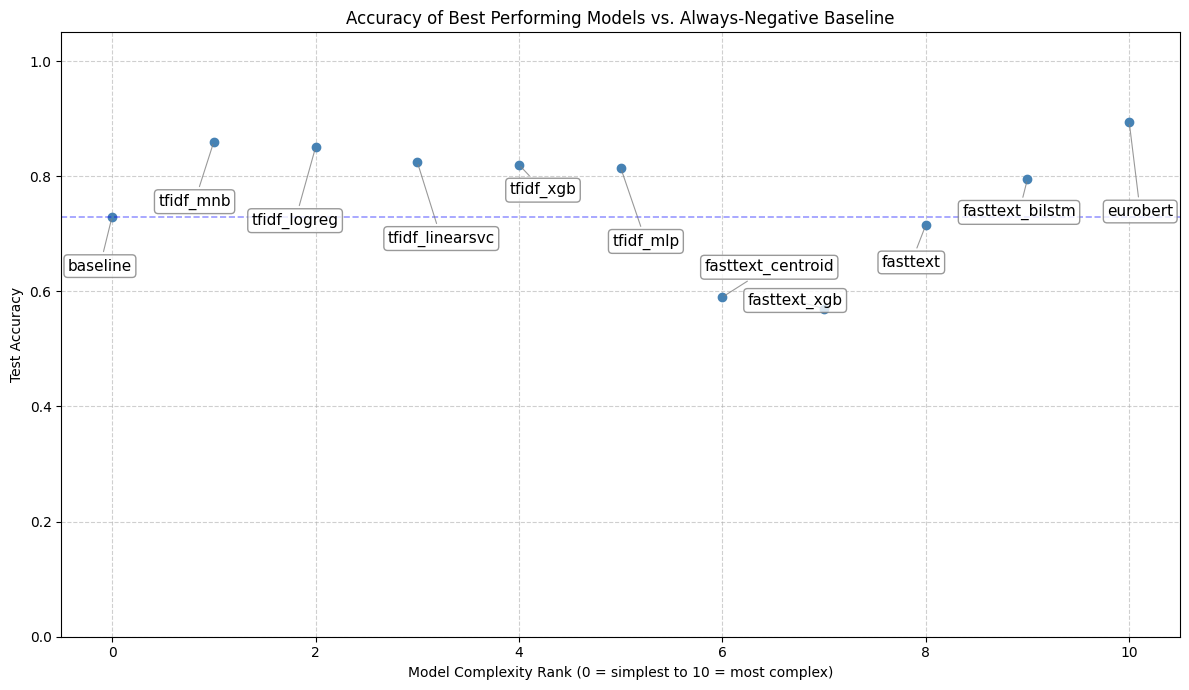

In [92]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Best models
df_best = df_final_results[df_final_results["is_best"] == 1].copy()
df_best = df_best.sort_values("complexity_rank")

plt.figure(figsize=(12,7))
plt.scatter(df_best["complexity_rank"], df_best["accuracy"], color="steelblue", zorder=2)

texts = []
label_y = 0.55  # Baseline Höhe für Labels

for idx, row in df_best.iterrows():
    texts.append(
        plt.annotate(
            row["model_base"],
            xy=(row["complexity_rank"], row["accuracy"]),  # Punkt
            xytext=(row["complexity_rank"], label_y),      # Start unterhalb
            fontsize=11,
            ha="center",
            bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="gray", alpha=0.8),
            arrowprops=dict(arrowstyle="-", color="gray", lw=0.8, alpha=0.8)
        )
    )

# Jetzt auch horizontale Bewegung zulassen, damit sich nichts überlappt
adjust_text(
    texts,
    only_move={'points':'xy', 'text':'xy'},  # erlaubt x und y
    force_points=0.8,
    force_text=0.8,
    expand_points=(1.4, 1.8),
    expand_text=(1.4, 1.8)
)

# ---- Baseline Accuracy Linie hinzufügen ----
baseline_acc = df_best.loc[df_best["model_base"] == "baseline", "accuracy"].values[0]
plt.axhline(
    y=baseline_acc,
    color="blue",
    linestyle="--",
    linewidth=1.2,
    alpha=0.4,
    label="Baseline Accuracy"
)

plt.xlabel("Model Complexity Rank (0 = simplest to 10 = most complex)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy of Best Performing Models vs. Always-Negative Baseline")
plt.ylim(0, 1.05)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




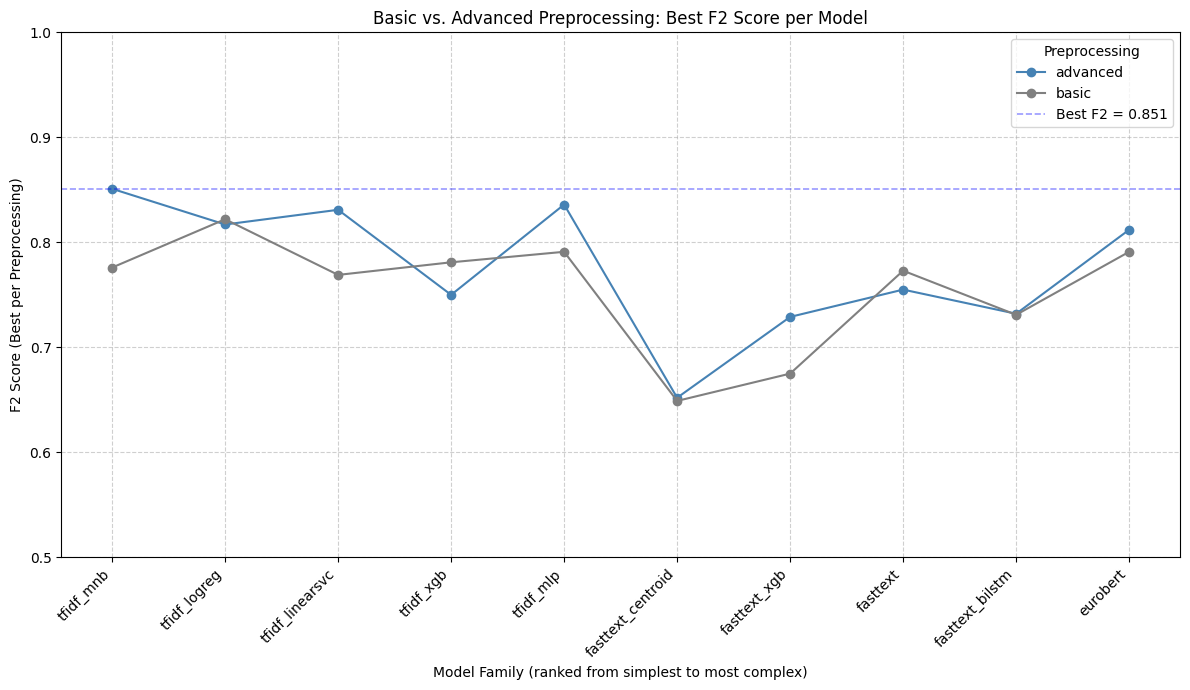

In [100]:
# Filter: nur beste Modelle pro Preprocessing, Baseline raus
df_prep_best = df_final_results[
    (df_final_results["is_best_preprocessing"] == 1) &
    (df_final_results["model_base"] != "baseline")
].copy()

# Sortieren nach Komplexität
df_prep_best = df_prep_best.sort_values("complexity_rank")

plt.figure(figsize=(12,7))

# Farben für basic/advanced
colors = {"basic": "gray", "advanced": "steelblue"}

# Linien + Punkte für jede Gruppe (basic / advanced)
for prep, group in df_prep_best.groupby("preprocessing"):
    plt.plot(
        group["model_base"], group["f2_score"],
        marker="o", linestyle="-", color=colors[prep], label=prep
    )

#best f2-score visualisieren
best_f2 = df_prep_best["f2_score"].max()
plt.axhline(
    y=best_f2,
    color="blue",
    linestyle="--",
    linewidth=1.2,
    alpha=0.4,
    label=f"Best F2 = {best_f2:.3f}"
)

# X-Achse: Modellnamen
plt.xticks(rotation=45, ha="right")

# Y-Achse: nur 0.5 bis 1
plt.ylim(0.5, 1.0)

plt.xlabel("Model Family (ranked from simplest to most complex)")
plt.ylabel("F2 Score (Best per Preprocessing)")
plt.title("Basic vs. Advanced Preprocessing: Best F2 Score per Model")
plt.legend(title="Preprocessing")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

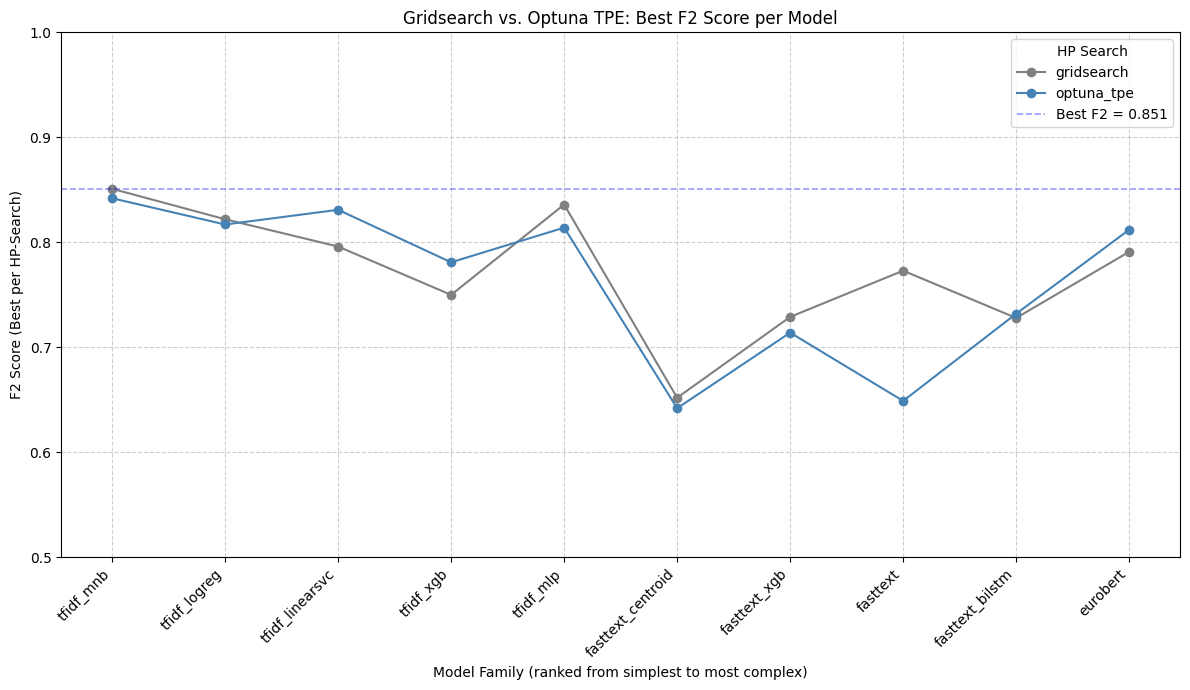

In [101]:
# Filter: nur beste Modelle pro HP-Search, Baseline raus
df_hp_best = df_final_results[
    (df_final_results["is_best_hpsearch"] == 1) &
    (df_final_results["model_base"] != "baseline")
].copy()

# Sortieren nach Komplexität
df_hp_best = df_hp_best.sort_values("complexity_rank")

plt.figure(figsize=(12,7))

# Farben für hp_search
colors = {"gridsearch": "gray", "optuna_tpe": "steelblue"}

# Linien + Punkte für jede Gruppe (hp_search)
for hp, group in df_hp_best.groupby("hp_search"):
    plt.plot(
        group["model_base"], group["f2_score"],
        marker="o", linestyle="-", color=colors.get(hp, "black"), label=hp
    )

# best f2-score visualisieren
best_f2 = df_hp_best["f2_score"].max()
plt.axhline(
    y=best_f2,
    color="blue",
    linestyle="--",
    linewidth=1.2,
    alpha=0.4,
    label=f"Best F2 = {best_f2:.3f}"
)

# X-Achse: Modellnamen
plt.xticks(rotation=45, ha="right")

# Y-Achse: nur 0.5 bis 1
plt.ylim(0.5, 1.0)

plt.xlabel("Model Family (ranked from simplest to most complex)")
plt.ylabel("F2 Score (Best per HP-Search)")
plt.title("Gridsearch vs. Optuna TPE: Best F2 Score per Model")
plt.legend(title="HP Search")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


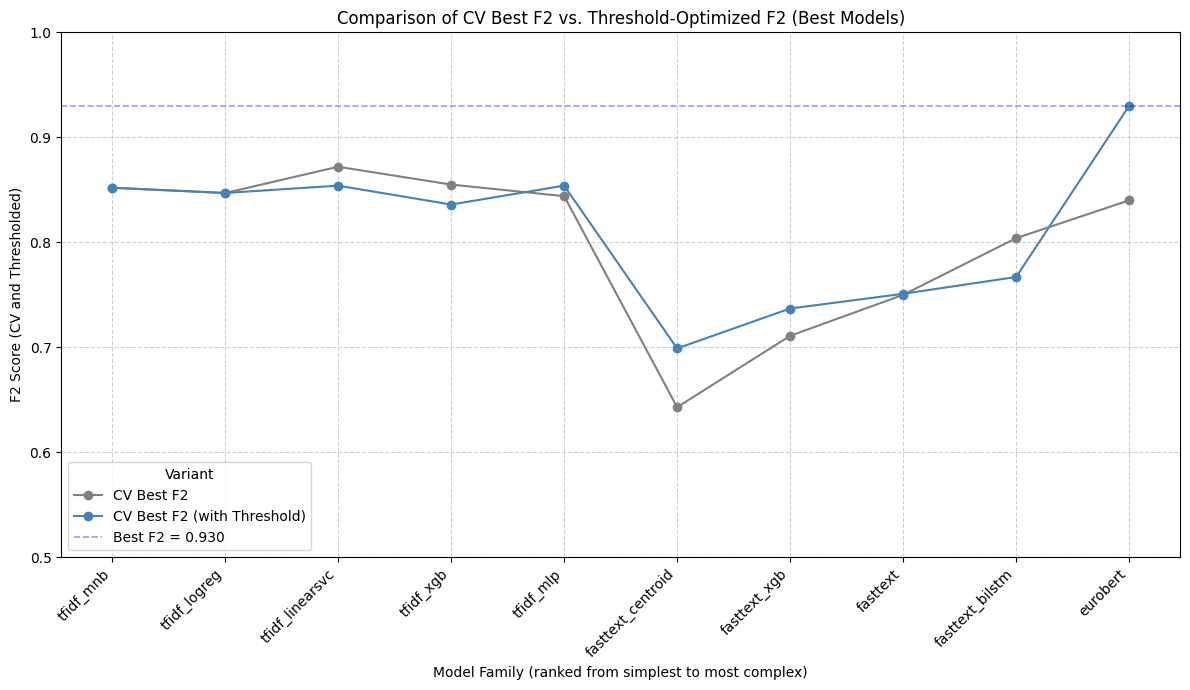

In [126]:


# Filter: nur beste Modelle, Baseline raus
df_cv_best = df_final_results[
    (df_final_results["is_best"] == 1) &
    (df_final_results["model_base"] != "baseline")
].copy()

# Sortieren nach Komplexität
df_cv_best = df_cv_best.sort_values("complexity_rank")

plt.figure(figsize=(12,7))

# Farben für die zwei Varianten
colors = {"cv_best_f2": "gray", "cv_f2_with_threshold": "steelblue"}

# Linien + Punkte für jede Variante
for col, label in zip(["cv_best_f2", "cv_f2_with_threshold"], ["CV Best F2", "CV Best F2 (with Threshold)"]):
    plt.plot(
        df_cv_best["model_base"], df_cv_best[col],
        marker="o", linestyle="-", color=colors[col], label=label
    )

# bestes F2 visualisieren
best_f2 = df_cv_best[["cv_best_f2", "cv_f2_with_threshold"]].max().max()
plt.axhline(
    y=best_f2,
    color="blue",
    linestyle="--",
    linewidth=1.2,
    alpha=0.4,
    label=f"Best F2 = {best_f2:.3f}"
)

# X-Achse: Modellnamen
plt.xticks(rotation=45, ha="right")

# Y-Achse: sinnvoll skalieren (0.5–1)
plt.ylim(0.5, 1.0)

plt.xlabel("Model Family (ranked from simplest to most complex)")
plt.ylabel("F2 Score (CV and Thresholded)")
plt.title("Comparison of CV Best F2 vs. Threshold-Optimized F2 (Best Models)")
plt.legend(title="Variant")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\tdoro\AppData\Local\Temp\ipykernel_14296\447484427.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(


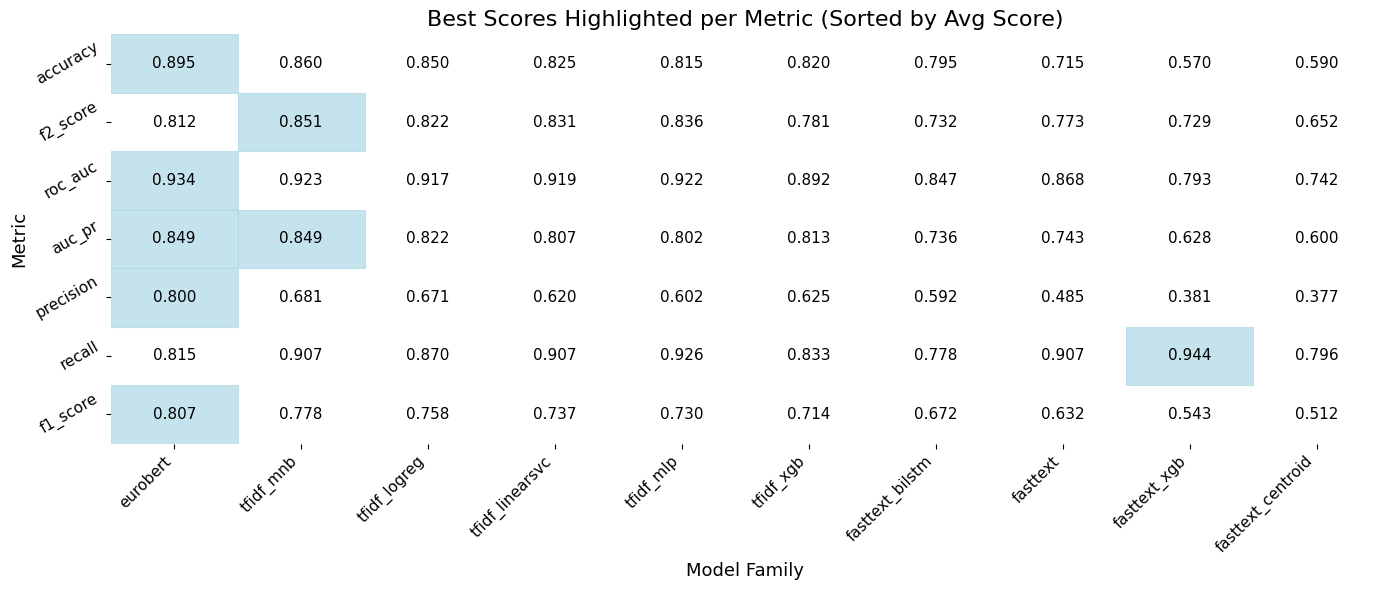

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nur beste Modelle pro Familie, Baseline raus
df_best = df_final_results[
    (df_final_results["is_best"] == 1) &
    (df_final_results["model_base"] != "baseline")
].copy()

# Relevante Metriken
metrics = ["accuracy", "f2_score", "roc_auc", "auc_pr", "precision", "recall", "f1_score"]

# Matrix: Modelle = Spalten, Metriken = Zeilen
score_matrix = df_best.set_index("model_base")[metrics].T

# Maske für beste Werte je Zeile
best_mask = score_matrix.eq(score_matrix.max(axis=1), axis=0)

# Durchschnitts-Scores → zum Sortieren
avg_scores = score_matrix.mean(axis=0).sort_values(ascending=False)
score_matrix = score_matrix[avg_scores.index]
best_mask = best_mask[avg_scores.index]

# --- Plot ---
plt.figure(figsize=(14, 6))

# Heatmap: alles weiß, nur Werte anzeigen
ax = sns.heatmap(
    score_matrix,
    annot=score_matrix.round(3),
    fmt=".3f",
    cmap="Blues",   # egal, wir machen alles weiß
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"size": 11, "color": "black"},
    vmin=0, vmax=1,   # feste Skala
    alpha=0.0         # unsichtbar -> alles weiß
)

# Jetzt nur Bestwerte hellblau einfärben
for y in range(score_matrix.shape[0]):        # Zeilen
    for x in range(score_matrix.shape[1]):    # Spalten
        if best_mask.iloc[y, x]:
            ax.add_patch(plt.Rectangle(
                (x, y), 1, 1, fill=True, color="lightblue",
                edgecolor="gray", lw=0.8, zorder=2, alpha=0.7
            ))

plt.title("Best Scores Highlighted per Metric (Sorted by Avg Score)", fontsize=16)
plt.xlabel("Model Family", fontsize=13)
plt.ylabel("Metric", fontsize=13)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=30, ha="right", fontsize=11)   # << hier der Drehwinkel für Y-Achse

plt.tight_layout()
plt.show()



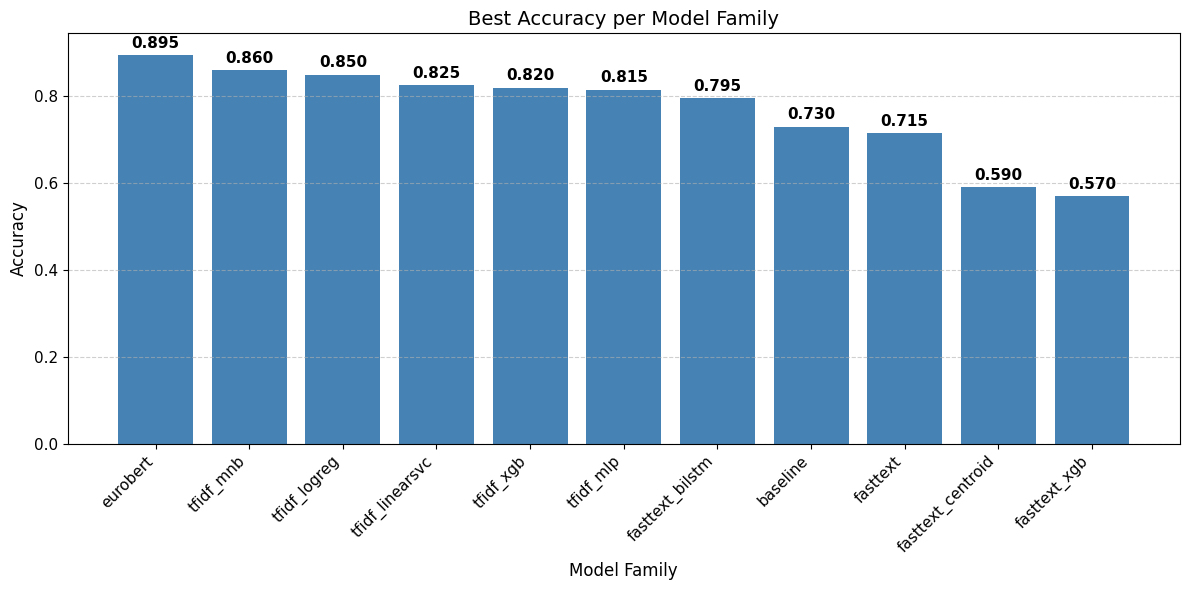

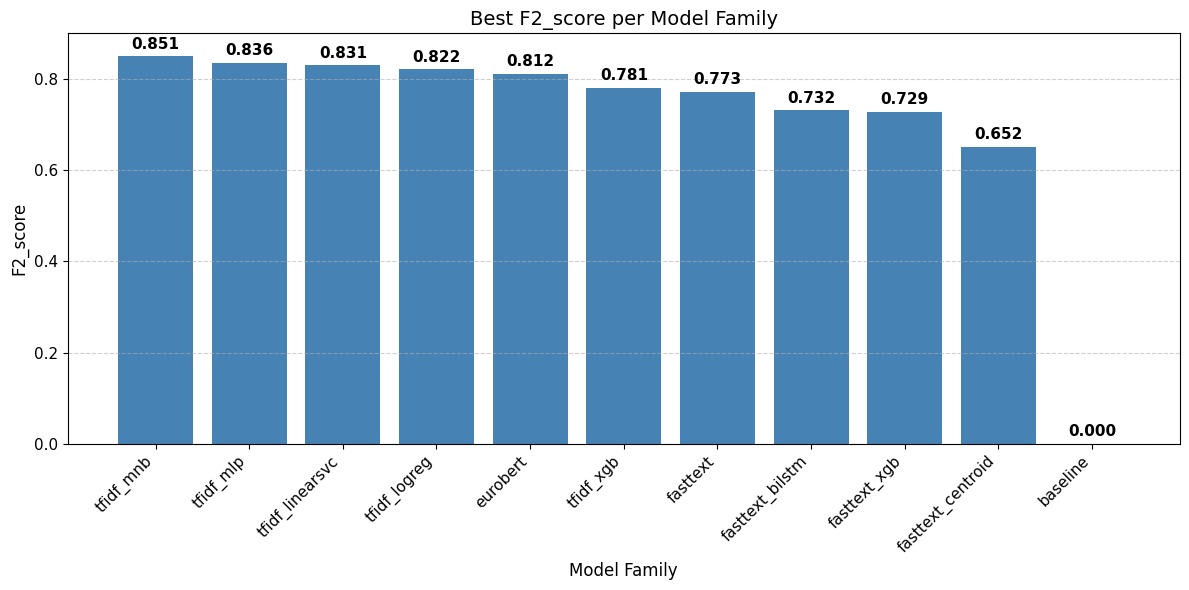

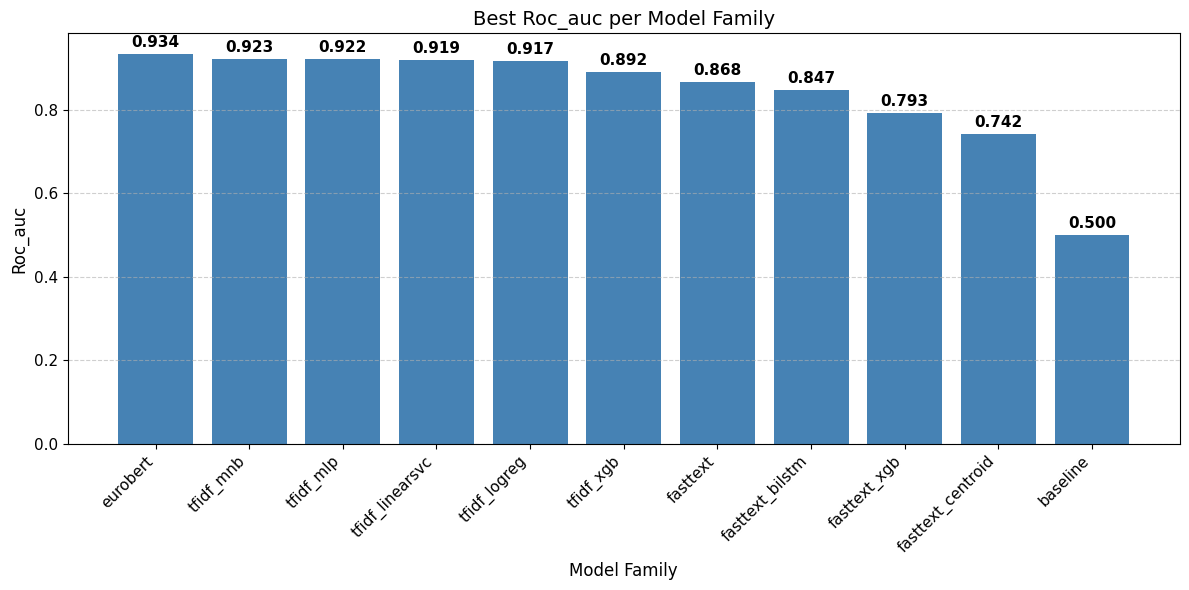

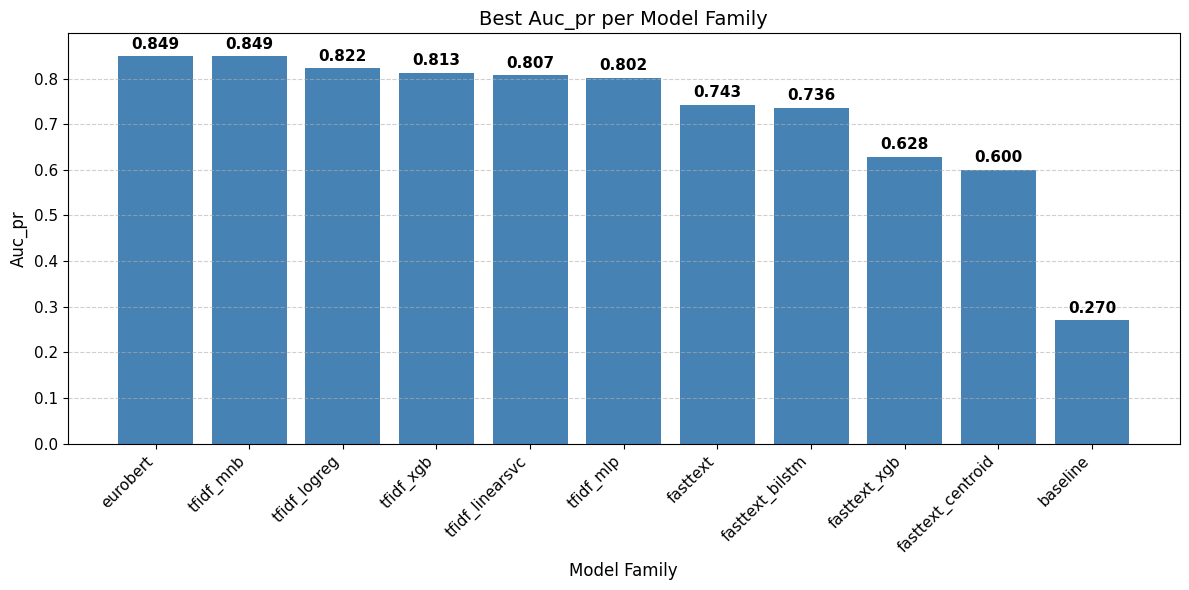

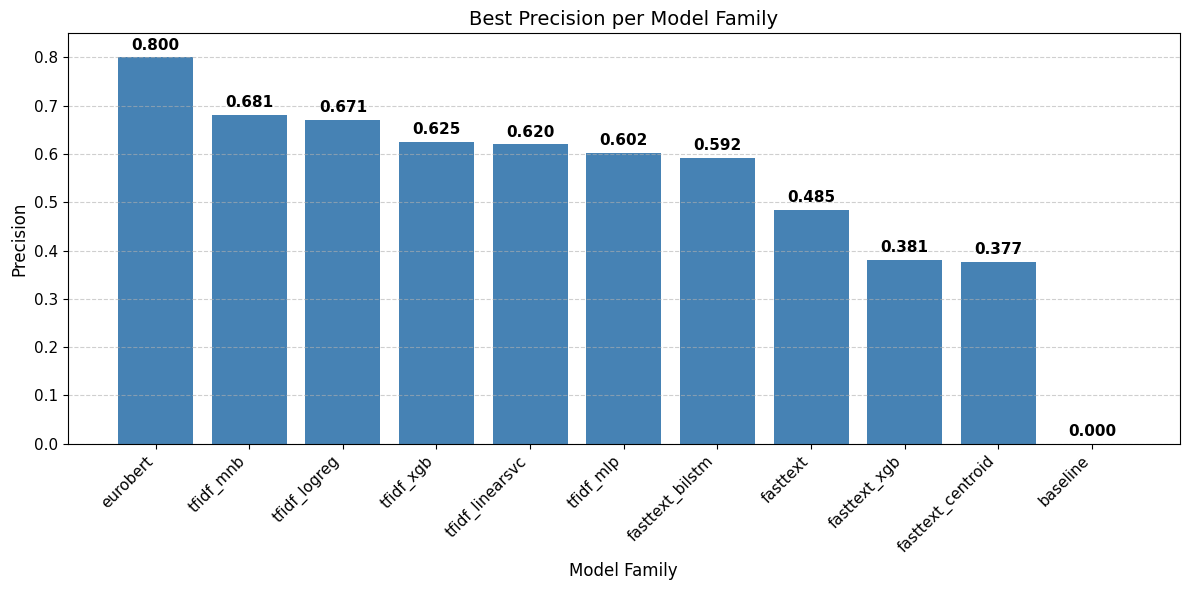

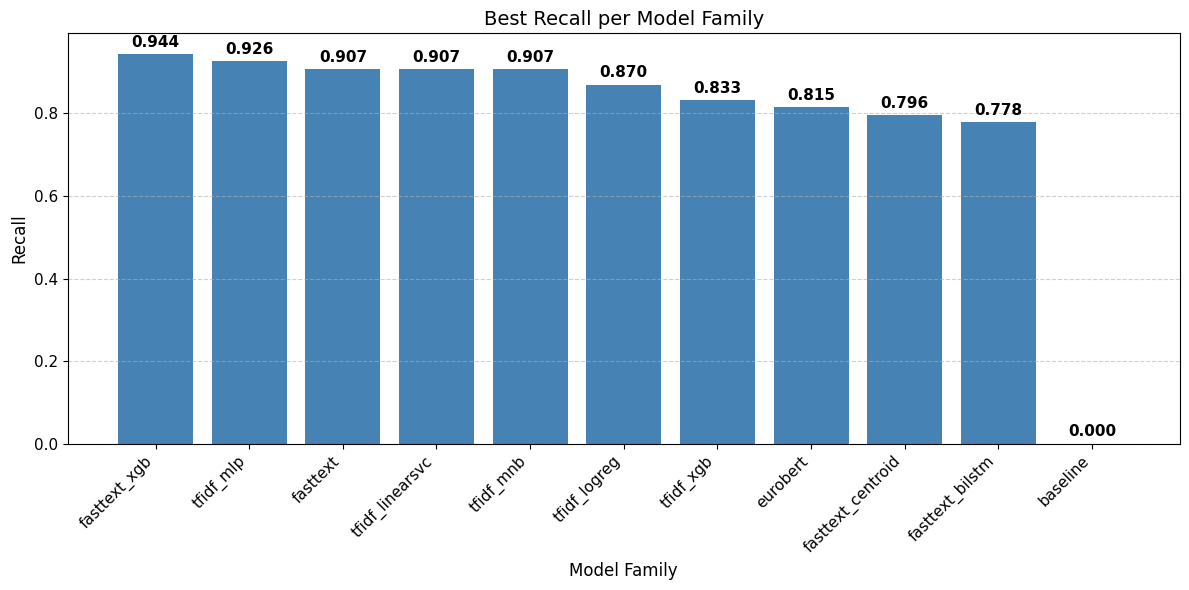

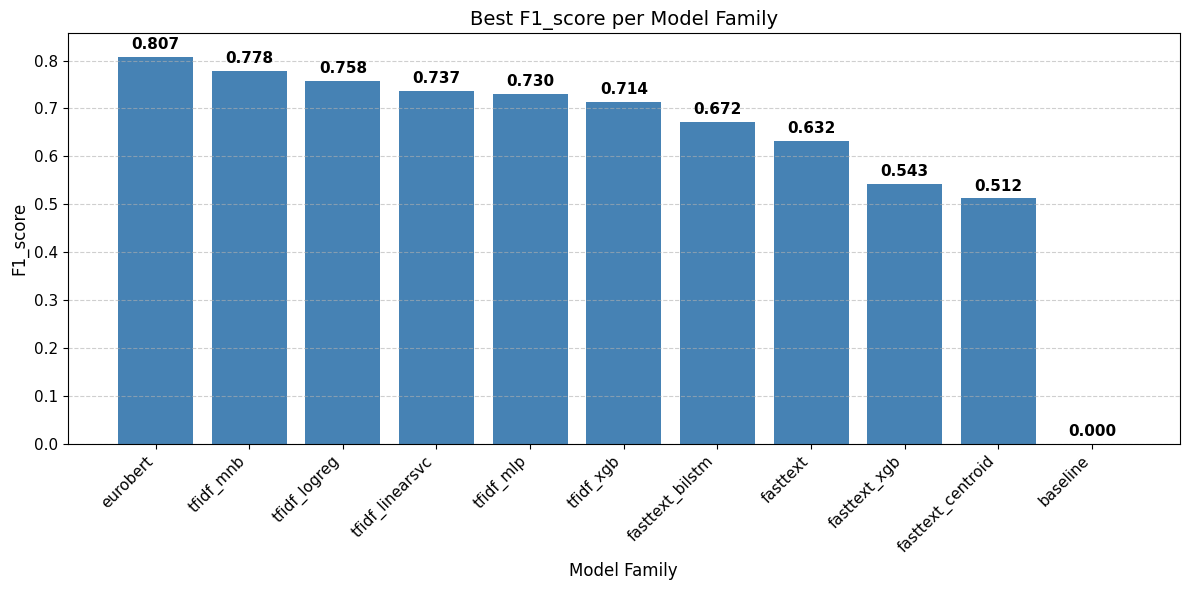

In [110]:


# Nur die besten Modelle pro Familie
df_best = df_final_results[df_final_results["is_best"] == 1].copy()

# Alle interessanten Metriken
metrics = ["accuracy", "f2_score", "roc_auc", "auc_pr", "precision", "recall", "f1_score"]

for metric in metrics:
    # Sortiere nach Wert (höchster Balken links)
    df_best_sorted = df_best.sort_values(metric, ascending=False)

    plt.figure(figsize=(12,6))
    bars = plt.bar(df_best_sorted["model_base"], df_best_sorted[metric], color="steelblue")

    # Werte immer über dem Balken beschriften
    for bar, val in zip(bars, df_best_sorted[metric]):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.01,  # Abstand nach oben
            f"{val:.3f}",
            ha="center", va="bottom",
            color="black", fontsize=11, fontweight="bold"
        )

    # Y-Achse mit Puffer nach oben, damit Text Platz hat
    max_val = df_best_sorted[metric].max()
    plt.ylim(0, max_val + 0.05)

    # Achsen & Titel
    plt.title(f"Best {metric.capitalize()} per Model Family", fontsize=14)  # nicht fett
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.xlabel("Model Family", fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=11)
    plt.yticks(fontsize=11)

    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


